In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_excel("../energy_prod_def.xlsx")

In [3]:
list = ["emission_factor", "biofuel_elec_per_capita", "coal_elec_per_capita", "gas_elec_per_capita", 
        "hydro_elec_per_capita", "nuclear_elec_per_capita", "oil_elec_per_capita", 
        "solar_elec_per_capita", "wind_elec_per_capita"]

In [4]:
df1_filtered = df1[list]

df1_filtered.columns = ['emission_factor', 'biofuel', "coal", "gas", 
        "hydro", "nuclear", "oil", 
        "solar", "wind"]

df1_filtered.to_excel('classification_df.xlsx', index=False)

In [5]:
df2 = df1_filtered

In [3]:
df2 = pd.read_excel("classification_df.xlsx")

In [ ]:
def emission_categorization(x):
    if x <= 2.322: # 
        return "0"
    if x > 2.322: # 
        return "1"

df2["emission_factor"] = df2["emission_factor"].apply(emission_categorization)
df2.to_excel('classification_df.xlsx', index=False)

In [ ]:
exclude_column = "emission_factor"

# Selezionare le colonne da scalare
columns_to_scale = df2.columns.difference([exclude_column])

# Applicare MinMaxScaler
scaler = MinMaxScaler()
df2[columns_to_scale] = scaler.fit_transform(df2[columns_to_scale])
df2.to_excel('classification_df.xlsx', index=False)

In [8]:
pd.set_option('display.width', 160)
print(df2)

     emission_factor   biofuel      coal       gas     hydro   nuclear       oil     solar      wind
0                  0  0.001917  0.027249  0.007600  0.002894  0.001846  0.003933  0.000008  0.000066
1                  0  0.001926  0.027237  0.008152  0.003029  0.001484  0.003880  0.000008  0.000158
2                  0  0.002307  0.027553  0.009131  0.003113  0.001619  0.003723  0.000008  0.000162
3                  0  0.002207  0.028429  0.009523  0.002943  0.001667  0.003778  0.000007  0.000190
4                  0  0.002263  0.028995  0.010565  0.003029  0.001717  0.003472  0.000015  0.000266
...              ...       ...       ...       ...       ...       ...       ...       ...       ...
1076               0  0.054464  0.137422  0.054653  0.017221  0.040206  0.007891  0.050446  0.052227
1077               0  0.057102  0.133181  0.055588  0.017235  0.041214  0.007336  0.061238  0.057873
1078               0  0.059803  0.126715  0.054726  0.017545  0.039248  0.006727  0.073353 

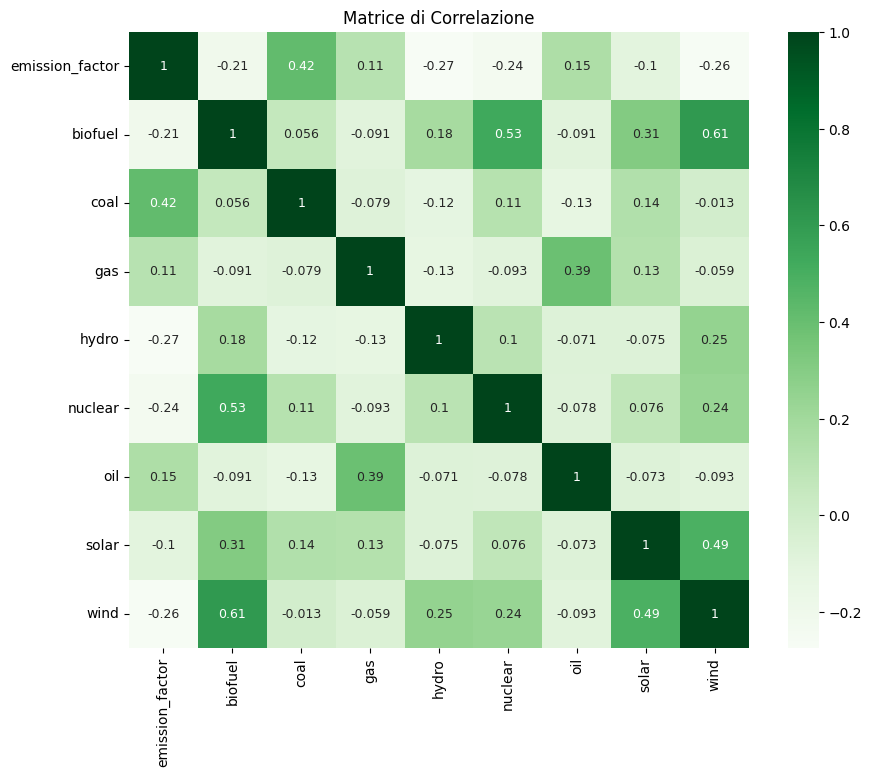

In [9]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Calcola la matrice di correlazione
matrice_correlazione = df2.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matrice_correlazione, annot=True, cmap="Greens", annot_kws={"size": 9})
plt.title("Matrice di Correlazione")
plt.show()